In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB as GB

In [3]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

### EDA

In [4]:
df_train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


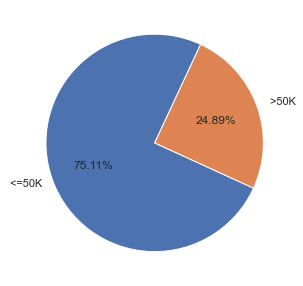

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
labels = list(df_train.Salary.unique())
sizes = list(df_train.Salary.value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=65)
plt.show()

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

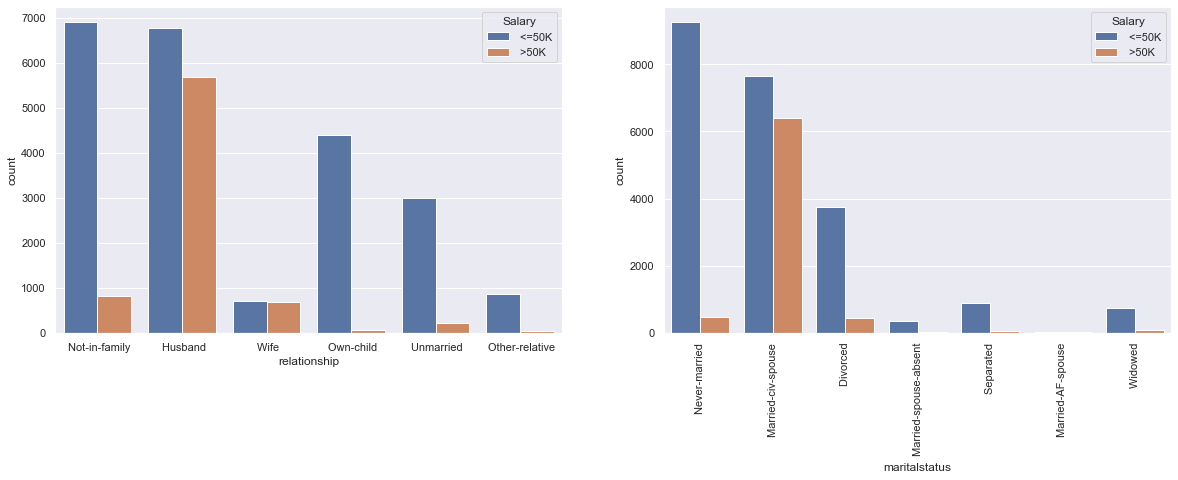

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.countplot(data=df_train,x='relationship',hue='Salary',ax=ax1)
plt.xticks(rotation=90);
sns.countplot(data=df_train,x='maritalstatus',hue='Salary',ax=ax2)

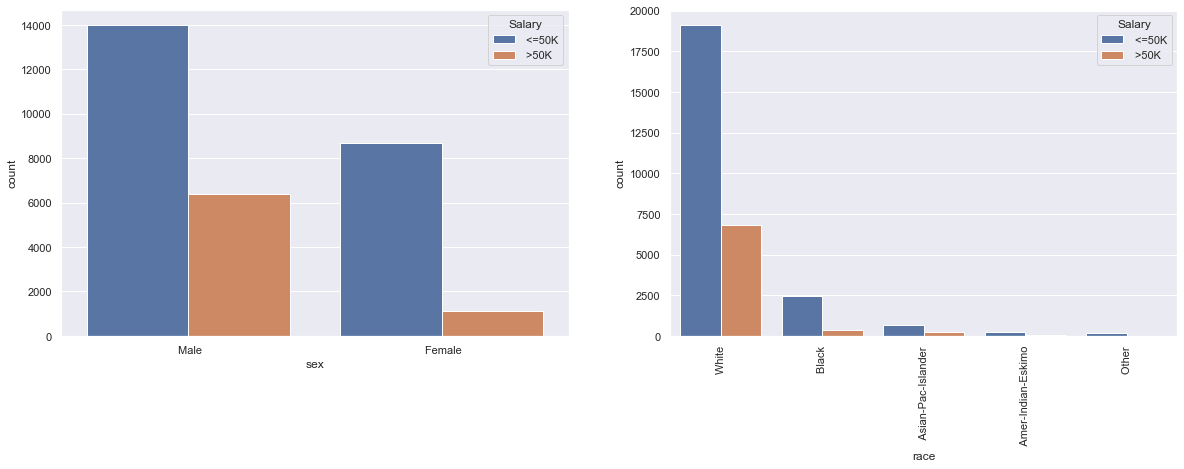

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.countplot(data=df_train,x='sex',hue='Salary',ax=ax1)
sns.countplot(data=df_train,x='race',hue='Salary',ax=ax2)
plt.xticks(rotation=90);

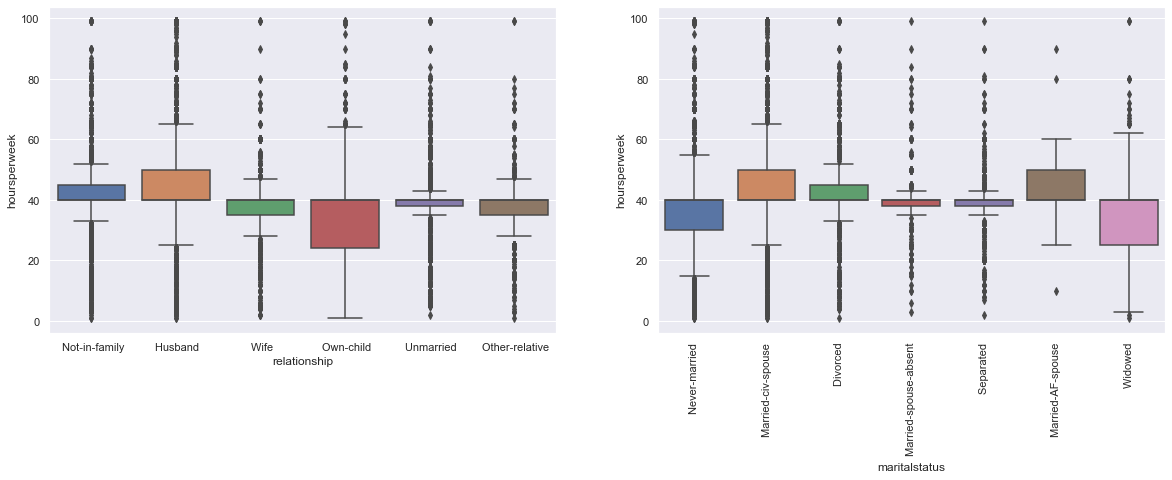

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.boxplot(data=df_train,x='relationship',y='hoursperweek',ax=ax1)
plt.xticks(rotation=90);
sns.boxplot(data=df_train,x='maritalstatus',y='hoursperweek',ax=ax2)
plt.xticks(rotation=90);

In [10]:
df_test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
cols = list(df_train.select_dtypes(include='object').columns)

In [13]:
cols = cols[:8]

In [14]:
le = LabelEncoder()

In [15]:
for c in cols:
    df_train[c]=le.fit_transform(df_train[c])
    df_test[c]=le.fit_transform(df_test[c])

In [16]:
X_train = df_train.drop('Salary',axis=1)
y_train = df_train['Salary']
X_test = df_test.drop('Salary',axis=1)
y_test = df_test['Salary']

### Naive Bayes model

In [17]:
model = GB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Performance metrics

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



#### Accuracy is 79%

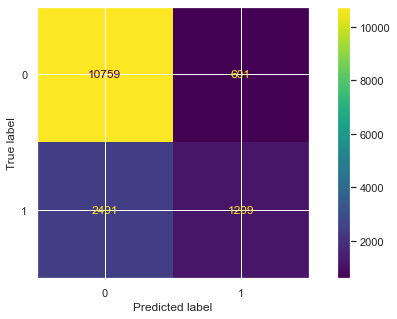

In [19]:
cfx = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
cfx.plot()